<a href="https://colab.research.google.com/github/hkhnhan1994/KHMT_TTNT_PROTORL_TRAIN/blob/main/train_TTNT_benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
!nvidia-smi

Mounted at /content/gdrive
/bin/bash: nvidia-smi: command not found


In [21]:
%cd /content/gdrive/MyDrive/Colab Notebooks/

/content/gdrive/MyDrive/Colab Notebooks


In [22]:
# !git clone https://github.com/hkhnhan1994/KHMT_TTNT_PROTORL_TRAIN.git
%cd KHMT_TTNT_PROTORL_TRAIN/Code

/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code


In [6]:
%pwd

'/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code'

In [9]:
!ls

2023.04.07  2023.04.08


/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local


In [ ]:
!pip install termcolor==1.1.0 
!pip install dm-env
!pip install scikit-learn
!pip install dm-control
!pip install deepmind
!pip install torchvision mujoco_py
!pip install tb-nightly imageio==2.9.0 imageio-ffmpeg==0.4.4 hydra-core==1.1.0 hydra-submitit-launcher==1.1.5 pandas==1.3.0 ipdb==0.13.9 yapf==0.31.0
!pip install mujoco_py==2.0.2.13 scikit-learn matplotlib==3.4.2
!pip install  opencv-python==4.5.3.56
!pip install  wandb==0.11.1
!pip install  moviepy==1.0.3
!pip install protobuf==3.19.6
!pip install numpy==1.23.5

In [ ]:
#pretrain: already pretrain with 100k and 250k steps (snapshot_ts)
!python3 pretrain.py agent=proto domain=jaco

In [ ]:
#downstream train
#task:
# JACO_TASKS = [
#     'jaco_reach_top_left',
#     'jaco_reach_top_right',
#     'jaco_reach_bottom_left',
#     'jaco_reach_bottom_right',
# ]
# snapshot_ts=100000 or 250000
!python3 finetune.py agent=proto  task=jaco_reach_top_left snapshot_ts=250000 obs_type=states

In [ ]:
!python3 finetune.py task=jaco_reach_top_left snapshot_ts=250000 obs_type=states agent=proto reward_free=true

In [ ]:
# %load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir=exp_local

In [79]:
import os
from glob import glob
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
dir="./exp_local"
start_dir = Path.cwd() / dir
print(start_dir)
files = []
structure={} # name of dict path csv file
pattern   = "*.csv"
for dir,_,_ in os.walk(start_dir):
    files.extend(glob(os.path.join(dir,pattern)))
for p in files:
  path=os.path.dirname(p)
  f=os.path.basename(path)
  structure[f]=[]
for p in files:
  path=os.path.dirname(p)
  f=os.path.basename(path)
  structure[f].append(p)
structure
# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

# df1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.07/111705_proto/train.csv")
# df2 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.07/111705_proto/train.csv")
# plt.plot(df.episode, df.episode_reward)
# ep_re = df[['episode', 'episode_reward']]
# step_re = df[['step', 'episode_reward']]
# step_re
# step_re.plot()
# plt.show()

/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local


{'111705_proto': ['/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.07/111705_proto/eval.csv',
  '/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.07/111705_proto/train.csv'],
 '154845_proto': ['/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.07/154845_proto/eval.csv',
  '/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.07/154845_proto/train.csv'],
 '050027_proto': ['/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.08/050027_proto/eval.csv',
  '/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.08/050027_proto/train.csv'],
 '084030_proto': ['/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.08/084030_proto/train.csv',
  '/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.08/084030_proto/eval

In [139]:
pre = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.07/111705_proto/train.csv")
dow = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.08/050027_proto/train.csv")
no_dow = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.08/084030_proto/train.csv")

eval_pre = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.07/111705_proto/eval.csv")
eval_dow = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.08/050027_proto/eval.csv")
eval_no_dow = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/KHMT_TTNT_PROTORL_TRAIN/Code/exp_local/2023.04.08/084030_proto/eval.csv")


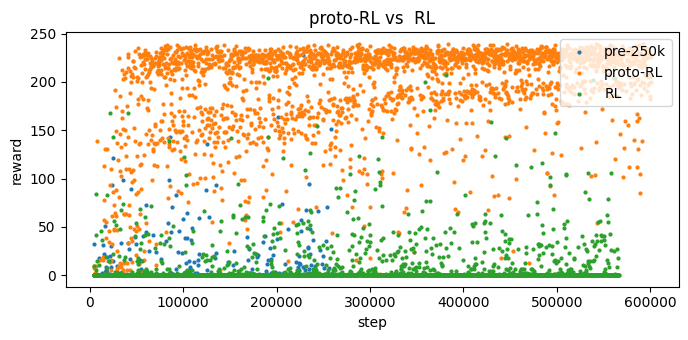

In [147]:
plt.title('proto-RL vs  RL')
plt.scatter(pre.step, pre.episode_reward,label="pre-250k",s=4)
plt.scatter(dow.step, dow.episode_reward,label="proto-RL",s=4)
plt.scatter(no_dow.step, no_dow.episode_reward,label="RL",s=4)
plt.legend(loc='upper right')
plt.xlabel("step")
plt.ylabel("reward")
plt.show()

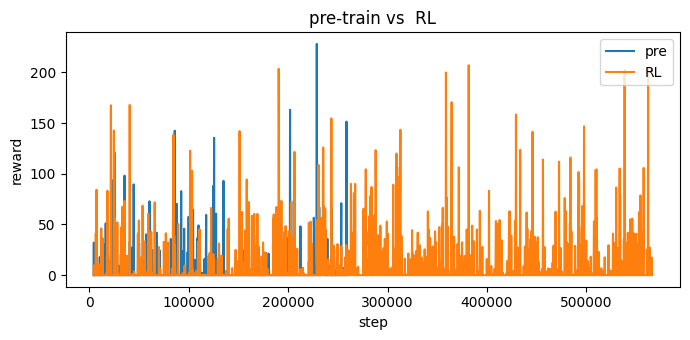

In [144]:

plt.title('pre-train vs  RL')
plt.plot(pre.step, pre.episode_reward,label="pre")
plt.plot(no_dow.step, no_dow.episode_reward,label="RL")
plt.legend(loc='upper right')
plt.xlabel("step")
plt.ylabel("reward")
plt.show()

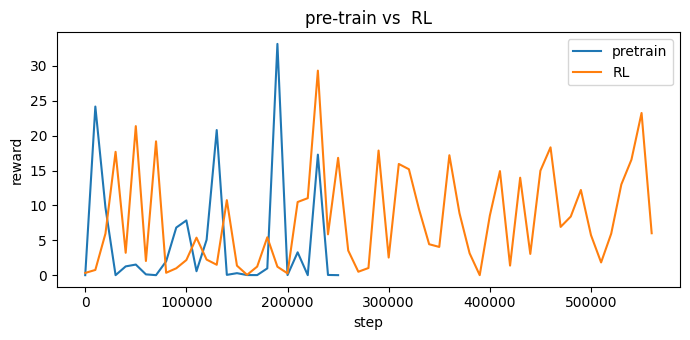

In [145]:
plt.title('pre-train vs  RL')

plt.plot(eval_pre.step, eval_pre.episode_reward,label="pretrain")
plt.plot(eval_no_dow.step, eval_no_dow.episode_reward,label="RL")
plt.legend(loc='upper right')
plt.xlabel("step")
plt.ylabel("reward")
plt.show()

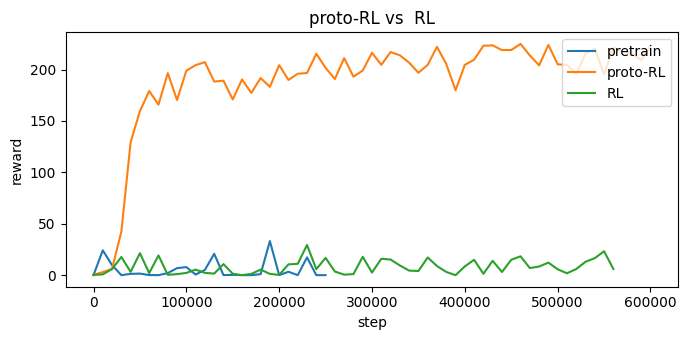

In [146]:
plt.title('proto-RL vs  RL')
plt.plot(eval_pre.step, eval_pre.episode_reward,label="pretrain")
plt.plot(eval_dow.step, eval_dow.episode_reward,label="proto-RL")
plt.plot(eval_no_dow.step, eval_no_dow.episode_reward,label="RL")
plt.legend(loc='upper right')
plt.xlabel("step")
plt.ylabel("reward")
plt.show()

In [ ]:
# if tensorboard is running,kill tensorboard before reloading it
# !kill $(ps -e | grep 'tensorboard' | awk '{print $1}')

In [ ]:
# add to browser insopect to keep colab running
# function ClickConnect() {
#     console.log("Working");
#     document.querySelector("paper-icon-button").click()
# }
# setInterval(ClickConnect, 60000);

In [ ]:
## incolabm conda, cuda toolkit are already installed
#################################################################################
# INSTALL MAMBA ON GOOGLE COLAB
#################################################################################
# !pip install -q condacolab
# import condacolab
# condacolab.install()
# ! conda install -y mamba
# ! mamba update -qy --all
# ! mamba clean -qafy
# import sys
# sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
# !mamba env create -f conda_env.yml
# !conda remove -n urlb --allyy

In [ ]:
# !conda env list

In [ ]:
### run in terminal
# sudo ln -s /opt/conda/root/etc/profile.d/conda.sh /etc/profile.d/conda.s
# mamba init bash
# mamba activate urlb
# !mamba env update -n base -f conda_env.yml

# The Unsupervised Reinforcement Learning Benchmark (URLB)

URLB provides a set of leading algorithms for unsupervised reinforcement learning where agents first pre-train without access to extrinsic rewards and then are finetuned to downstream tasks.

This codebase was adapted from [DrQv2](https://github.com/facebookresearch/drqv2). The DDPG agent and training scripts were developed by Denis Yarats. All authors contributed to developing individual baselines for URLB.

## Requirements
We assume you have access to a GPU that can run CUDA 10.2 and CUDNN 8. Then, the simplest way to install all required dependencies is to create an anaconda environment by running
```sh
conda env create -f conda_env.yml
```
After the instalation ends you can activate your environment with
```sh
conda activate urlb
```

## Implemented Agents
| Agent | Command | Implementation Author(s) | Paper |
|---|---|---|---|
| ICM | `agent=icm` | Denis | [paper](https://arxiv.org/abs/1705.05363)|
| ProtoRL | `agent=proto` | Denis | [paper](https://arxiv.org/abs/2102.11271)|
| DIAYN | `agent=diayn` | Misha | [paper](https://arxiv.org/abs/1802.06070)|
| APT(ICM) | `agent=icm_apt` | Hao, Kimin | [paper](https://arxiv.org/abs/2103.04551)|
| APT(Ind) | `agent=ind_apt` | Hao, Kimin | [paper](https://arxiv.org/abs/2103.04551)|
| APS | `agent=aps` | Hao, Kimin | [paper](http://proceedings.mlr.press/v139/liu21b.html)|
| SMM | `agent=smm` | Albert | [paper](https://arxiv.org/abs/1906.05274) |
| RND | `agent=rnd` | Kevin | [paper](https://arxiv.org/abs/1810.12894) |
| Disagreement | `agent=disagreement` | Catherine | [paper](https://arxiv.org/abs/1906.04161) |

## Available Domains
We support the following domains.
|| Domain | Tasks |
|---|---|
| `walker` | `stand`, `walk`, `run`, `flip` |
| `quadruped` | `walk`, `run`, `stand`, `jump` |
| `jaco` | `reach_top_left`, `reach_top_right`, `reach_bottom_left`,`reach_bottom_right` |
## Domain observation mode
Each domain supports two observation modes: states and pixels.
| Model | Command |
|---|---|
| states | `obs_type=states` |
| pixels | `obs_type=pixels` |
## Instructions
### Pre-training
To run pre-training use the `pretrain.py` script
```sh
python pretrain.py agent=icm domain=walker
```
or, if you want to train a skill-based agent, like DIAYN, run:
```sh
python pretrain.py agent=diayn domain=walker
```
This script will produce several agent snapshots after training for `100k`, `500k`, `1M`, and `2M` frames. The snapshots will be stored under the following directory:
```sh
./pretrained_models/<obs_type>/<domain>/<agent>/
```
For example:
```sh
./pretrained_models/states/walker/icm/
```

### Fine-tuning
Once you have pre-trained your method, you can use the saved snapshots to initialize the `DDPG` agent and fine-tune it on a downstream task. For example, let's say you have pre-trained `ICM`, you can fine-tune it on `walker_run` by running the following command:
```sh
python finetune.py pretrained_agent=icm task=walker_run snapshot_ts=1000000 obs_type=states
```
This will load a snapshot stored in `./pretrained_models/states/walker/icm/snapshot_1000000.pt`, initialize `DDPG` with it (both the actor and critic), and start training on `walker_run` using the extrinsic reward of the task.

For methods that use skills, include the agent, and the `reward_free` tag to false.
```sh
python finetune.py pretrained_agent=smm task=walker_run snapshot_ts=1000000 obs_type=states agent=smm reward_free=false
```

### Monitoring
Logs are stored in the `exp_local` folder. To launch tensorboard run:
```sh
tensorboard --logdir exp_local
```
The console output is also available in a form:
```
| train | F: 6000 | S: 3000 | E: 6 | L: 1000 | R: 5.5177 | FPS: 96.7586 | T: 0:00:42
```
a training entry decodes as
```
F  : total number of environment frames
S  : total number of agent steps
E  : total number of episodes
R  : episode return, episode_reward: total_reward / episode
FPS: training throughput (frames per second)
T  : total training time
L  : episode_length: step * self.cfg.action_repeat / episode

```
